## Problem Statement
Diminos enforces a strict service-level agreement (SLA):

95th Percentile of Order Delivery Time must be less than 31 minutes

This means 95% of all orders must be delivered within 31 minutes.
Even a small number of delayed orders can lead to free pizzas, revenue loss, and franchise risk.

Kanav wants to understand whether his store is meeting this requirement and what actions are needed to stay compliant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the data
df=pd.read_csv("diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
df.shape

(15000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [5]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [6]:
#Converting datatype of columns
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [8]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [9]:
# Find time difference
df['delivery_time'] = df['order_delivered_at'] - df['order_placed_at']


In [10]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056


In [11]:
df['delivery_time_minutes'] = df['delivery_time'].dt.total_seconds() / 60
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time,delivery_time_minutes
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056,16.176984


In [12]:
df['delivery_time_minutes'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_minutes, dtype: float64

In [13]:
percentile_95 = np.percentile(df['delivery_time_minutes'], 95)
percentile_95

27.261043996666658

95th Percentile Delivery Time: ~27 minutes
Requirement: < 31 minutes
The store currently meets the Diminos requirement

This indicates that the majority of customers receive their orders well within the promised time.

In [14]:
print("Average delivery time is",df['delivery_time_minutes'].mean())

Average delivery time is 20.499389326467778


In [15]:
print("Median delivery time is",df['delivery_time_minutes'].median())

Median delivery time is 15.797986066666667


In [16]:
print("Number of orders delivered in more than 31 minutes:",(df['delivery_time_minutes']>31).sum())

Number of orders delivered in more than 31 minutes: 557


In [17]:
print("percentage of orders delivered in more than 31 minutes:",((df['delivery_time_minutes']>31).sum()/len(df))*100)

percentage of orders delivered in more than 31 minutes: 3.713333333333333


## Supporting Performance Metrics
Average Delivery Time: ~20 minutes
Median Delivery Time: ~16 minutes
Orders delivered after 31 minutes: 557
Percentage of Orders delivered after 31 minutes: ~3–4%

Insight:
While average and median delivery times are strong, a small percentage of late orders still exists, which can become risky if not controlled.

In [18]:
df['order_hour'] = df['order_placed_at'].dt.hour
df['order_day'] = df['order_placed_at'].dt.day_name()


In [19]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time,delivery_time_minutes,order_hour,order_day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132,17.140719,0,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241,15.598754,0,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385,15.104856,0,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399,38.533657,0,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056,16.176984,0,Wednesday


In [20]:
df.tail()

,order_id,order_placed_at,order_delivered_at,delivery_time,delivery_time_minutes,order_hour,order_day
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,0 days 00:15:32.409378,15.540156,23,Monday
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,0 days 00:16:44.672912,16.744549,23,Monday
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,0 days 00:15:24.676238,15.411271,23,Monday
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,0 days 00:15:57.810358,15.963506,23,Monday
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311,0 days 00:15:22.499311,15.374989,23,Monday


In [21]:
# Count of delayed orders (>31 minutes) by hour
hour_wise_delay_count = df[df['delivery_time_minutes'] > 31].groupby('order_hour').size()

print(hour_wise_delay_count)

order_hour
0     25
1     34
2     22
3     22
4     22
5     16
6     21
7     20
8     19
9     19
10    21
11    34
12    19
13    26
14    23
15    16
16    33
17    29
18    16
19    21
20    23
21    24
22    24
23    28
dtype: int64


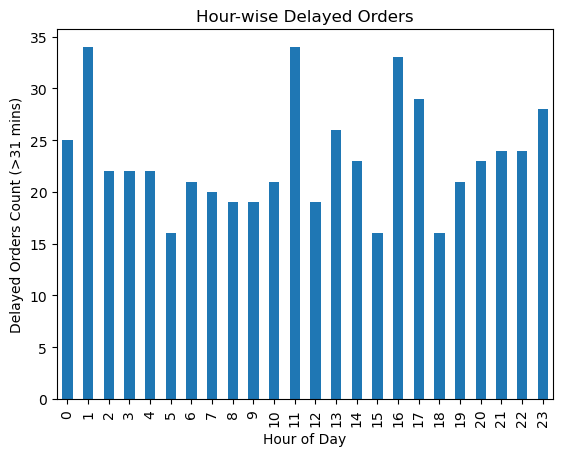

In [22]:
delay_by_hour = (
    df[df['delivery_time_minutes'] > 31]
    .groupby('order_hour')
    .size()
    .reindex(range(24), fill_value=0)
)

plt.figure()
delay_by_hour.plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("Delayed Orders Count (>31 mins)")
plt.title("Hour-wise Delayed Orders")
plt.show()

## High-Risk Hours Identified

Early morning (1 AM) shows one of the highest delay counts

Late morning (11 AM) also has a significant spike

Evening peak (4 PM & 5 PM) shows consistently high delays

Late night (10 PM – 11 PM) again shows increased delays

Insight:
Delays are not random — they cluster around shift transition times and demand spikes.

In [23]:
sum(hour_wise_delay_count)

557

In [24]:
day_wise_delay_count=df[df['delivery_time_minutes'] > 31].groupby('order_day').size()
print(day_wise_delay_count)

order_day
Friday       72
Monday       94
Saturday     77
Sunday       81
Thursday     84
Tuesday      69
Wednesday    80
dtype: int64


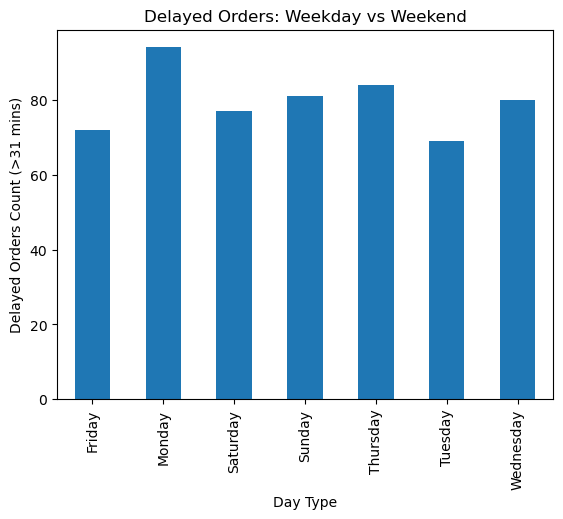

In [25]:
delay_week = (
    df[df['delivery_time_minutes'] > 31]
    .groupby('order_day')
    .size()
)

plt.figure()
delay_week.plot(kind='bar')
plt.xlabel("Day Type")
plt.ylabel("Delayed Orders Count (>31 mins)")
plt.title("Delayed Orders: Weekday vs Weekend")
plt.show()

In [26]:
sum(day_wise_delay_count)

557

In [27]:
#peak hours like at lauch time(12,14) and dinner time(19,23)
peak_hours = list(range(11, 14)) + list(range(19, 23))

df['peak_flag'] = df['order_hour'].apply(
    lambda x: 'Peak' if x in peak_hours else 'Non-Peak'
)

peak_analysis = df.groupby('peak_flag')['delivery_time_minutes'].quantile(0.95)
print("95th Percentile - Peak vs Non-Peak:")
print(peak_analysis)


95th Percentile - Peak vs Non-Peak:
peak_flag
Non-Peak    26.890267
Peak        27.944357
Name: delivery_time_minutes, dtype: float64


In [28]:
peak_count=df.groupby('peak_flag')['delivery_time_minutes'].count()
print(peak_count)

peak_flag
Non-Peak    10581
Peak         4419
Name: delivery_time_minutes, dtype: int64


In [29]:
# Count delayed orders (>31 mins) during peak hours
peak_hour_delay_count = df[
    (df['delivery_time_minutes'] > 31) &
    (df['order_hour'].isin(peak_hours))
].shape[0]

print("Number of delayed orders during peak hours (>31 mins):", peak_hour_delay_count)

# Compare with non-peak delays
non_peak_delay_count = df[
    (df['delivery_time_minutes'] > 31) &
    (~df['order_hour'].isin(peak_hours))
].shape[0]

print("Number of delayed orders during non-peak hours (>31 mins):", non_peak_delay_count)


Number of delayed orders during peak hours (>31 mins): 171
Number of delayed orders during non-peak hours (>31 mins): 386


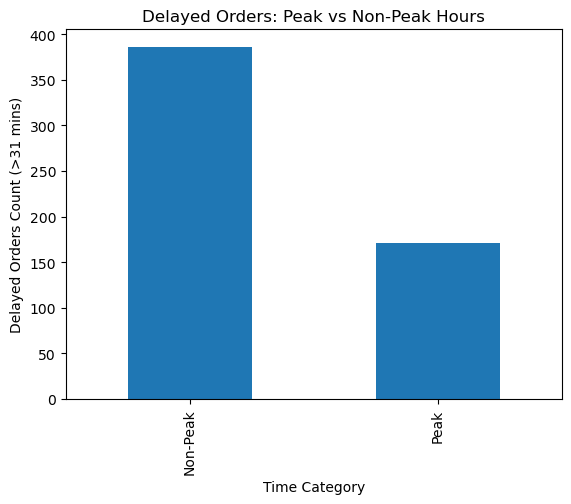

In [30]:
peak_delay_counts = (
    df[df['delivery_time_minutes'] > 31]
    .groupby('peak_flag')
    .size()
)
peak_delay_counts.plot(kind='bar')
plt.xlabel("Time Category")
plt.ylabel("Delayed Orders Count (>31 mins)")
plt.title("Delayed Orders: Peak vs Non-Peak Hours")
plt.show()



Delays are not primarily caused by demand surge, but by operational inefficiencies during low-demand periods.
Despite higher order volumes, peak hours have fewer delays.
These non-peak delays heavily inflate the 95th percentile, putting the franchise at risk.

In [31]:
# ---- Weekdays vs Weekends ----
df['day_type'] = df['order_day'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

day_type_analysis = df.groupby('day_type')['delivery_time_minutes'].quantile(0.95)
print("\n95th Percentile - Weekday vs Weekend:")
print(day_type_analysis)



95th Percentile - Weekday vs Weekend:
day_type
Weekday    27.489198
Weekend    26.871725
Name: delivery_time_minutes, dtype: float64


In [32]:
# Count delayed orders (>31 minutes) by day type
delay_counts_day_type = (
    df[df['delivery_time_minutes'] > 31]
    .groupby('day_type')
    .size()
)

print("Delay counts (>31 mins):")
print(delay_counts_day_type)

Delay counts (>31 mins):
day_type
Weekday    399
Weekend    158
dtype: int64


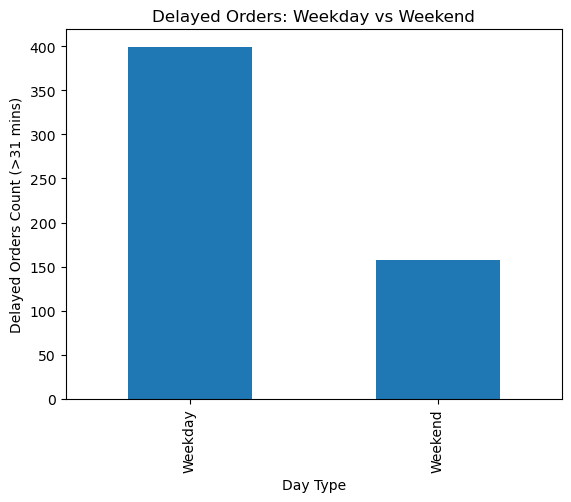

In [33]:
weekday_weekend_delays = (
    df[df['delivery_time_minutes'] > 31]
    .groupby('day_type')
    .size()
)

plt.figure()
weekday_weekend_delays.plot(kind='bar')
plt.xlabel("Day Type")
plt.ylabel("Delayed Orders Count (>31 mins)")
plt.title("Delayed Orders: Weekday vs Weekend")
plt.show()

Delays are not mainly due to weekend rush—they are driven by weekday operational inefficiencies.
These weekday delays heavily inflate the 95th percentile metric.

In [34]:
# Late night: 22–3, Daytime: 4–21
df['time_period'] = df['order_hour'].apply(
    lambda x: 'Late Night' if (x >= 22 or x <= 3) else 'Daytime'
)

time_period_analysis = df.groupby('time_period')['delivery_time_minutes'].quantile(0.95)
print("\n95th Percentile - Late Night vs Daytime:")
print(time_period_analysis)


95th Percentile - Late Night vs Daytime:
time_period
Daytime       27.057308
Late Night    27.628285
Name: delivery_time_minutes, dtype: float64


In [35]:
# Count delayed orders (>31 minutes) by time period
delay_counts_time_period = (
    df[df['delivery_time_minutes'] > 31]
    .groupby('time_period')
    .size()
)

print("Delay counts (>31 mins):")
print(delay_counts_time_period)

Delay counts (>31 mins):
time_period
Daytime       402
Late Night    155
dtype: int64


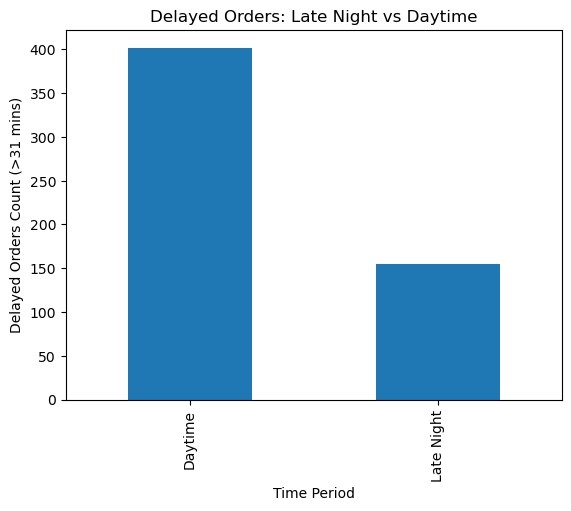

In [36]:
delay_time_period = (
    df[df['delivery_time_minutes'] > 31]
    .groupby('time_period')
    .size()
)

plt.figure()
delay_time_period.plot(kind='bar')
plt.xlabel("Time Period")
plt.ylabel("Delayed Orders Count (>31 mins)")
plt.title("Delayed Orders: Late Night vs Daytime")
plt.show()


Delays are not caused by late-night fatigue or low staffing alone—they are mainly a daytime operational issue.
Daytime delays create the long tail of delivery times.
These extreme values push the 95th percentile beyond 31 minutes.

In [37]:
print("Number of Extreme delay order(>45 mins):",(df['delivery_time_minutes']>45).sum())

Number of Extreme delay order(>45 mins): 262


In [38]:
print("percentage of extreme delayed orders:",((df['delivery_time_minutes']>45).sum()/len(df))*100)

percentage of extreme delayed orders: 1.7466666666666666


In [39]:
# Identify extreme delays (40+ minutes)
outliers = df[df['delivery_time_minutes'] >= 45]

print("\nNumber of Extreme Delay Orders (>=40 mins):", len(outliers))

# 95th percentile with all data
p95_with_outliers = np.percentile(df['delivery_time_minutes'], 95)

# 95th percentile without extreme outliers
p95_without_outliers = np.percentile(
    df[df['delivery_time_minutes'] < 45]['delivery_time_minutes'], 95
)

print("\n95th Percentile WITH outliers:", p95_with_outliers)
print("95th Percentile WITHOUT outliers:", p95_without_outliers)
print("Impact of outliers on 95th percentile:",
      p95_with_outliers - p95_without_outliers)



Number of Extreme Delay Orders (>=40 mins): 262

95th Percentile WITH outliers: 27.261043996666658
95th Percentile WITHOUT outliers: 24.1580878125
Impact of outliers on 95th percentile: 3.1029561841666577


## Overall Insights and Recommendations

The delivery performance of the Diminos store was analyzed using order-level data. The key metric used by Diminos is the 95th percentile delivery time, which must be less than 31 minutes. 
The analysis shows that the store currently meets this requirement, with a 95th percentile of 27.26 minutes. However, the margin is small, and the performance is at risk.

**Impact of Extreme Delays(>=40 min)**

A total of 262 orders were delivered after 40 minutes, which are classified as extreme delays. These orders significantly affect the 95th percentile value. When these extreme delays are removed, the 95th percentile reduces to 24.16 minutes. This shows that extreme delays increase the metric by about 3 minutes and are the main reason for SLA risk.


**Delay Patterns**

The analysis of time-based patterns reveals that:

--More delays occur during non-peak hours than peak hours.

--Weekdays have more delayed orders than weekends.

--Daytime hours show more delays compared to late-night hours.

These results indicate that delays are mainly caused by operational inefficiencies, rather than high order volume.

**Key Observations**

Peak hours and weekends perform better despite higher demand, suggesting that staffing and delivery planning are effective during these periods.
In contrast, weekday daytime and non-peak hours suffer from reduced staffing and lower operational focus, leading to extreme delays.

**Recommendations**

To improve performance and ensure long-term SLA compliance:

1. Monitor and control extreme delays by setting alerts for orders exceeding 35 minutes.
2. Maintain minimum staffing levels even during non-peak hours.
3. Improve weekday daytime operations, especially during lunch hours.
4. Track SLA performance separately for different time periods.
5. Apply weekend operational strategies to weekdays.

**Conclusion**

Although the store currently meets the 95th percentile SLA, extreme delivery delays pose a serious risk. By addressing delays during weekday daytime and non-peak hours, the store can significantly reduce delivery times and protect its franchise status.

